# Task Overview

Makerble is a data platform that enables nonprofit organisations to measure their impact. Surveys are one of the main methods used by nonprofits to measure their impact using the Makerble platform. Makerble enables them to design, distribute and analyse surveys. We don’t expect you to be an expert on impact measurement but we do expect you to be able to analyse data. That’s why for this task we have provided you with a sample dataset from an Employee Experience Survey conducted at a fictional nonprofit organisation. Our task is to demonstrate both descriptive and inferential statistics skills to identify trends and insights from the survey responses. 

### Importing the libraries: 

In [44]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### Loading our Data

In [45]:
df = pd.read_csv(r"C:\Users\sudha\My Projects\Employee-Analysis\employee_experience_survey_data.csv")

In [46]:
df.head()

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,2024-10-05,Disagree,Strongly Agree,Neutral,Neutral,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree
1,Jane Smith,18-24,Female,Middle Eastern,Operations Manager,Sales,2024-10-07,Agree,Strongly Disagree,Strongly Agree,Neutral,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Neutral
2,Carlos Reyes,45-54,Female,Indian,UX Designer,Consulting,2024-10-08,Neutral,Strongly Disagree,Agree,Disagree,Strongly Agree,Agree,Agree,Strongly Disagree,Neutral,Strongly Agree,Strongly Agree
3,Emily Zhang,35-44,Male,Caucasian,UX Designer,HR,2024-10-07,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Strongly Disagree,Agree,Neutral
4,Michael Johnson,18-24,Female,Caucasian,UX Designer,Product Development,2024-10-07,Agree,Strongly Agree,Disagree,Neutral,Strongly Disagree,Disagree,Disagree,Disagree,Strongly Disagree,Neutral,Disagree


Let's start with Descriptive Analysis of the data: 

## 1. Descriptive Analysis 

In [47]:
## Mapping survey responses to numeric values for analysis

response_mapping = {
    
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}


In [48]:
# Mapping response_mapping to the specified columns
df["Job Satisfaction"] = df["Job Satisfaction"].map(response_mapping)
df["Work-Life Balance"] = df["Work-Life Balance"].map(response_mapping)
df["Overall Engagement"] = df["Overall Engagement"].map(response_mapping)
df["Management Support"] = df["Management Support"].map(response_mapping)
df["Team Collaboration"] = df["Team Collaboration"].map(response_mapping)
df["Workload Fairness"] = df["Workload Fairness"].map(response_mapping)
df["Career Development Opportunities"] = df["Career Development Opportunities"].map(response_mapping)
df["Workplace Inclusivity"] = df["Workplace Inclusivity"].map(response_mapping)
df["Company Communication"] = df["Company Communication"].map(response_mapping)
df["Compensation Satisfaction"] = df["Compensation Satisfaction"].map(response_mapping)
df["Job Security"] = df["Job Security"].map(response_mapping)

In [49]:
df.head(5)

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,2024-10-05,2,5,3,3,3,2,4,5,5,4,5
1,Jane Smith,18-24,Female,Middle Eastern,Operations Manager,Sales,2024-10-07,4,1,5,3,3,2,3,3,3,4,3
2,Carlos Reyes,45-54,Female,Indian,UX Designer,Consulting,2024-10-08,3,1,4,2,5,4,4,1,3,5,5
3,Emily Zhang,35-44,Male,Caucasian,UX Designer,HR,2024-10-07,3,4,4,1,1,5,4,1,1,4,3
4,Michael Johnson,18-24,Female,Caucasian,UX Designer,Product Development,2024-10-07,4,5,2,3,1,2,2,2,1,3,2


#### 1.1 Basic statistics:

In [50]:
descriptive_statistics = df[["Job Satisfaction", "Overall Engagement"]].describe()
print(descriptive_statistics)

       Job Satisfaction  Overall Engagement
count         15.000000           15.000000
mean           3.000000            3.400000
std            1.309307            1.298351
min            1.000000            1.000000
25%            2.000000            2.500000
50%            3.000000            3.000000
75%            4.000000            4.500000
max            5.000000            5.000000


#### 1.2 Identifying trends based on Age Bracket

In [51]:
age_bracket_trends = df.groupby('Age Bracket')[['Job Satisfaction', 'Overall Engagement']].mean()

In [52]:
age_bracket_trends

,Job Satisfaction,Overall Engagement
Age Bracket,,
18-24,3.428571,3.428571
25-34,3.000000,3.666667
35-44,2.000000,2.500000
45-54,2.666667,3.666667


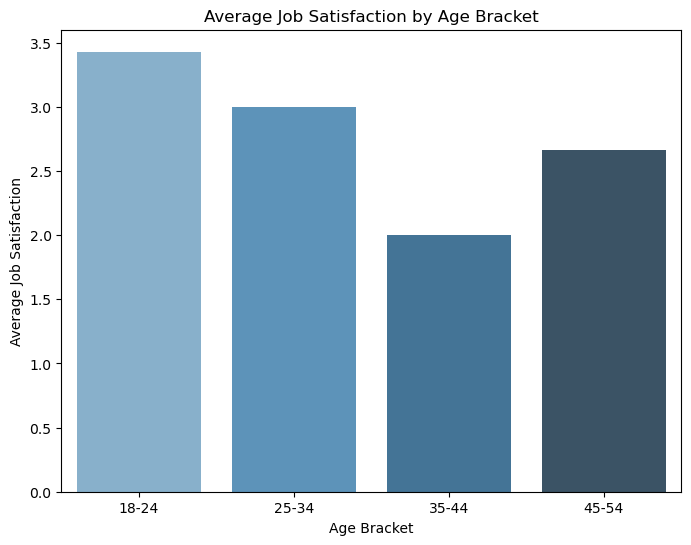

In [53]:
# Plot Job Satisfaction by Age Bracket
plt.figure(figsize=(8, 6))
sns.barplot(x=age_bracket_trends.index, y=age_bracket_trends['Job Satisfaction'], palette='Blues_d')
plt.title('Average Job Satisfaction by Age Bracket')
plt.ylabel('Average Job Satisfaction')
plt.xlabel('Age Bracket')
plt.show()

Trends by Age Bracket:
- 18-24: Average Job Satisfaction is 3.43, while Overall Engagement is 3.43.
- 25-34: Job Satisfaction is lower at 3.00, but Engagement is slightly higher at 3.67.
- 35-44: Job Satisfaction drops to 2.00, with Engagement at 2.50.
- 45-54: Job Satisfaction rises again to 2.67, with Engagement at 3.67.

#### 1.3 Identifying trends based on department 

In [54]:
department_trends = df.groupby('Department')[['Job Satisfaction', 'Overall Engagement']].mean()

In [55]:
department_trends

,Job Satisfaction,Overall Engagement
Department,,
Consulting,3.000000,4.000000
Design,5.000000,1.000000
Finance,4.000000,5.000000
HR,4.000000,3.500000
IT,1.000000,2.000000
Operations,2.000000,3.000000
Product Development,2.666667,3.666667
Sales,2.750000,3.500000


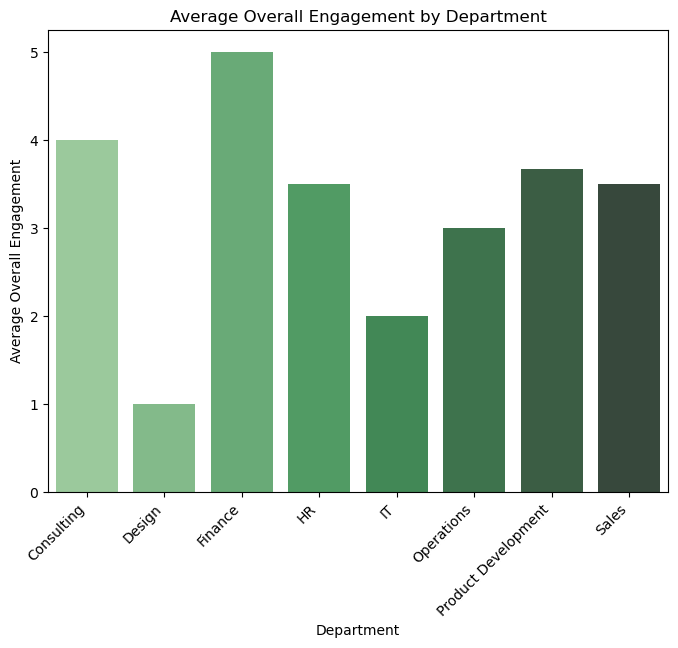

In [56]:
# Plot Overall Engagement by Department
plt.figure(figsize=(8, 6))
sns.barplot(x=department_trends.index, y=department_trends['Overall Engagement'], palette='Greens_d')
plt.title('Average Overall Engagement by Department')
plt.ylabel('Average Overall Engagement')
plt.xlabel('Department')
plt.xticks(rotation=45, ha="right")
plt.show()

Trends by Department:
- Finance shows the highest satisfaction (4.00) and engagement (5.00).
- HR and Consulting have similar engagement levels (around 3.5–4), but HR shows slightly higher satisfaction.
- IT has the lowest Job Satisfaction (1.00) and low engagement (2.00).

#### 1.4 Identifying trends based on Gender

In [57]:
genderwise_trends = df.groupby('Gender')[['Job Satisfaction', 'Overall Engagement']].mean()

In [58]:
genderwise_trends

,Job Satisfaction,Overall Engagement
Gender,,
Female,2.777778,3.666667
Male,3.333333,3.000000


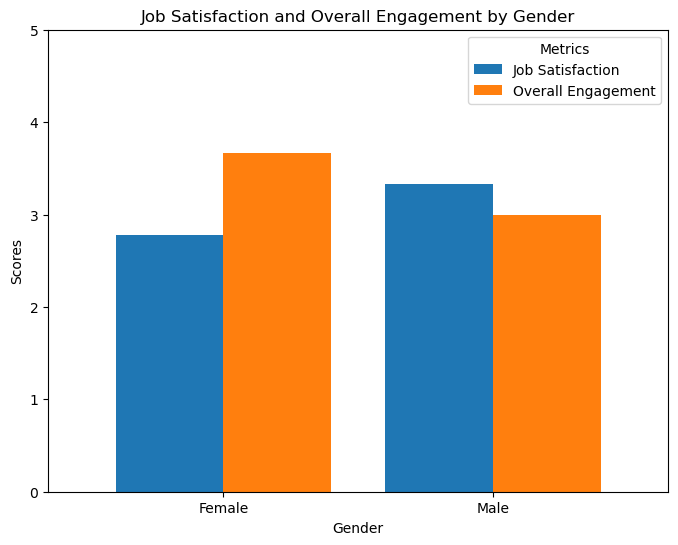

In [59]:
# Plotting a grouped bar chart
genderwise_trends.plot(kind='bar', figsize=(8, 6), width=0.8)
plt.title('Job Satisfaction and Overall Engagement by Gender')
plt.xlabel('Gender')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.ylim(0, 5) 
plt.show()

Insights from this: 
- **Males** have a higher average Job Satisfaction score of **3.33** compared to **2.78** for **Females**. This suggests that male employees may feel more satisfied with their jobs than female employees.
 - In terms of Overall Engagement, **Females** scored an average of **3.67**, which is higher than the **3.00** average score for **Males**.This indicates that female employees might be more engaged in their work than their male counterparts, despite lower job satisfaction.

## 2. Hypothesis testing 

In hypothesis testing, we test an assumption (called a hypothesis) about a population parameter using sample data. It helps us decide if the observed data significantly deviates from the null hypothesis.

Here we have to conduct a hypothesis test to see if there's a statistically significant difference in
Job Satisfaction between two specific departments (let's take IT and HR). State your
null hypothesis, test method (e.g., t-test), and explain your results.

In [60]:
from scipy import stats

# Extracting Job Satisfaction data for IT and HR departments
job_satisfaction_IT = df[df['Department'] == 'IT']['Job Satisfaction']
job_satisfaction_HR = df[df['Department'] == 'HR']['Job Satisfaction']

# Conduct an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(job_satisfaction_IT, job_satisfaction_HR, nan_policy='omit')

t_stat, p_value

C:\Users\sudha\AppData\Local\Temp\ipykernel_81760\3255496207.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(job_satisfaction_IT, job_satisfaction_HR, nan_policy='omit')
C:\Users\sudha\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\sudha\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


(nan, nan)